In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')
Rtec = pd.read_csv("rtec.csv")
Neon = pd.read_csv("neon.csv")
Neon

,U[V],Ua[V]
0,0.0,0.86
1,1.1,0.85
2,2.3,0.97
3,3.5,0.85
4,5.1,1.06
5,6.0,1.45
6,7.4,1.86
7,8.8,2.13
8,9.7,2.33
9,10.6,2.55


In [3]:
print(Rtec[:13].T.to_latex())
print(Rtec[14:26].T.to_latex())
print(Rtec[27:39].T.to_latex())
print(Rtec[40:51].T.to_latex())
# print(Rtec[45:51].T.to_latex())
print(Neon[:12].T.to_latex())
print(Neon[13:24].T.to_latex())
print(Neon[25:36].T.to_latex())
print(Neon[37:48].T.to_latex())
print(Neon[49:60].T.to_latex())
print(Neon[61:67].T.to_latex())
# print(Neon.to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &    0  &    1  &    2  &    3  &    4  &    5  &    6  &    7  &    8  &    9  &    10 &    11 &    12 \\
\midrule
U[V]  &  0.20 &  0.50 &  2.60 &  3.60 &  4.50 &  5.50 &  6.60 &  7.60 &  8.20 &  9.00 &  9.40 &  10.6 &  11.0 \\
Ua[V] &  3.12 &  3.18 &  3.82 &  3.01 &  2.85 &  3.75 &  4.26 &  4.11 &  3.69 &  4.15 &  4.85 &  10.6 &  12.1 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &     14 &     15 &     16 &     17 &     18 &     19 &     20 &    21 &    22 &     23 &     24 &     25 \\
\midrule
U[V]  &  11.60 &  12.50 &  13.10 &  13.30 &  13.50 &  14.20 &  15.20 &  15.7 &  16.2 &  16.40 &  16.60 &  17.60 \\
Ua[V] &  13.18 &   6.42 &   4.59 &   4.31 &   4.65 &   5.69 &  11.26 &  16.6 &  19.7 &  19.89 &  18.22 &   7.65 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &     27 &     28 &     29 &     30 &     31 &     32 &     33 &    34 &     35 &    36 &     37 &     38 \\
\midrule
U[V]  & 

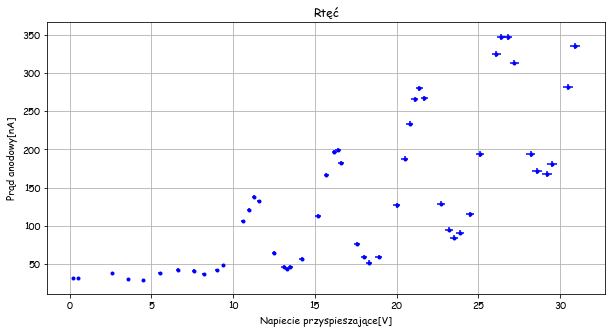

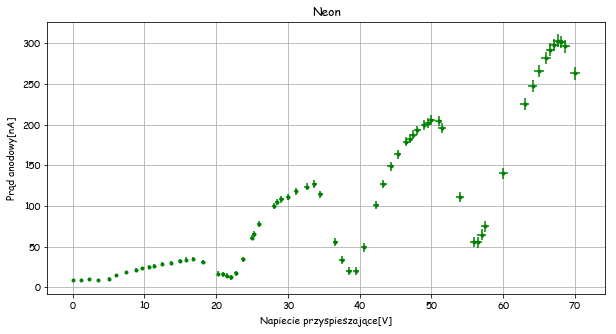

In [8]:
klasa = 0.01
D_U_Rtec = klasa*Rtec['U[V]']+0.01
D_U_Neon = klasa*Neon['U[V]']+0.01
plt.figure(figsize=(10,5))
plt.errorbar(Rtec['U[V]'],Rtec['Ua[V]']*10,(klasa*Rtec['U[V]']+0.1)*10,klasa*Rtec['U[V]']+0.01,'b.')
plt.grid(); plt.xlabel('Napiecie przyspieszające[V]'); plt.ylabel('Prąd anodowy[nA]'); plt.title('Rtęć')
plt.savefig('rtec.eps', bbox_inches='tight')
plt.show()
plt.figure(figsize=(10,5))
plt.errorbar(Neon['U[V]'],Neon['Ua[V]']*10,(klasa*Neon['U[V]']+0.1)*10,klasa*Neon['U[V]']+0.01,'g.')
plt.grid(); plt.xlabel('Napiecie przyspieszające[V]'); plt.ylabel('Prąd anodowy[nA]'); plt.title('Neon')
plt.savefig('neon.eps',bbox_inches='tight')

In [10]:
#Rtęć maksima
U_max_rtec = (Rtec['U[V]'][43]-Rtec['U[V]'][6])/4
D_U_max_rtec = np.sqrt(D_U_Rtec[43]**2+D_U_Rtec[6]**2)/4
#Rtęć minima
U_min_rtec = (Rtec['U[V]'][47]-Rtec['U[V]'][4])/5
D_U_min_rtec = np.sqrt(D_U_Rtec[47]**2+D_U_Rtec[4]**2)/5
#Neon maksima
U_max_neon = (Neon['U[V]'][64]-Neon['U[V]'][15])/3
D_U_max_neon = np.sqrt(D_U_Neon[64]**2+D_U_Neon[15]**2)/3
#Neon minima 
U_min_neon = (Neon['U[V]'][54]-Neon['U[V]'][20])/2
D_U_min_neon = np.sqrt(D_U_Neon[54]**2+D_U_Neon[20]**2)/2
print('Rtec: max - ',U_max_rtec,'+/-',D_U_max_rtec,'  min - ',U_min_rtec,'+/-',D_U_min_rtec)
print('Neon: max - ',U_max_neon,'+/-',D_U_max_neon,'  min - ',U_min_neon,'+/-',D_U_min_neon,)

Rtec: max -  5.05 +/- 0.0720503296314   min -  4.94 +/- 0.0613934849964
Neon: max -  16.9333333333 +/- 0.236239050305   min -  17.25 +/- 0.30964697641


In [7]:
e = 1.602e-19
print('Rtec: max - ',U_max_rtec*e,'  min - ',U_min_rtec*e)
print('Neon: max - ',U_max_neon*e,'  min - ',U_min_neon*e)

Rtec: max -  8.0901e-19   min -  7.91388e-19
Neon: max -  2.71272e-18   min -  2.76345e-18
